In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family = "Malgun Gothic")

from IPython.core.display import display, HTML

# 글씨가 뭉게져서 보이는 것 같으면 아래의 설정을 통해서 개선할 수 있음
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/gdrive/')

In [2]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "150%"),
    ("color", 'darkgreen')])]

In [3]:
# "Korea"라는 문자를 포함하는 모든 train데이터 레코드들 추출
train = pd.read_csv('data/train.csv')
train_korea = train[train["Country/Region"].str.contains("Korea")]
output = ''
output += train_korea.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"train_korea : {train_korea.shape}").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))

# "Korea"라는 문자를 포함하는 모든 test데이터 레코드들 추출
test = pd.read_csv('data/test.csv')
test_korea = test[test["Country/Region"].str.contains("Korea")]
# output = ''
# output += test_korea.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"test_korea : {test_korea.shape}").set_table_styles(styles)._repr_html_()
# output += "\xa0\xa0\xa0"
# display(HTML(output))

# submission data 불러오기
submission = pd.read_csv('data/submission.csv')
# output = ''
# output += submission.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"submission : {submission.shape}").set_table_styles(styles)._repr_html_()
# output += "\xa0\xa0\xa0"
# display(HTML(output))

# time 데이터에서 test값을 가져오기
time= pd.read_csv('../Corona19/coronavirusdataset_v2.0/Time.csv').iloc[:,:7]
output = ''
output += time.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"time : {time.shape}").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
8680,13021,nan,"Korea, South",36,128,2020-01-22,1,0
8681,13022,nan,"Korea, South",36,128,2020-01-23,1,0
8682,13023,nan,"Korea, South",36,128,2020-01-24,2,0


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


### 데이터별 날짜
- train_korea --> 1-22 ~ 3-23
- Time --> 1-20 ~ 3-22

In [4]:
# 다음 셀을 여러번 반복해도 에러나게 하지 않으려 설정
df1 = train_korea.copy()
df2 = time.copy()

In [48]:
train_korea = df1.set_index("Date")
time = df2.set_index("date")

# 위의 train_korea와 time데이터를 합침(같은 날짜끼리 합쳐지도록 위에서 설정함)
train_korea = pd.concat([time, train_korea], axis=1, sort=False)
train_korea.rename(columns={'test':'examination'}, inplace=True)  # test컬럼이 test데이터프레임과 헷갈릴 소지가 있어 바꿈
train_korea["Country/Region"].fillna("Korea, South", inplace=True)
train_korea["Lat"].fillna(36.0, inplace=True)
train_korea["Long"].fillna(128.0, inplace=True)
train_korea=train_korea.loc[train_korea["examination"].notnull()]
train_korea

,time,examination,negative,confirmed,released,deceased,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities
2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN
2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN
2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0
2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0
2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,0.0,295647.0,270888.0,8413.0,1540.0,84.0,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0
2020-03-19,0.0,307024.0,282555.0,8565.0,1947.0,91.0,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0
2020-03-20,0.0,316664.0,292487.0,8652.0,2233.0,94.0,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0
2020-03-21,0.0,327509.0,303006.0,8799.0,2612.0,102.0,13080.0,NaN,"Korea, South",36.0,128.0,8799.0,102.0


In [49]:
# 여긴 데이터프레임 보기 이쁘게 바꾸는 작업
# 이 셀은 여러번 실행 X, 처음부터 다시 하고 싶으면 위의 셀부터 다시 run할 것!

# column의 순서 바꾸기
train_korea = train_korea[list(train_korea.columns[6:]) + list(train_korea.columns[:6])]

# firm_examination_rate 컬럼 새로 만들기
train_korea["firm_examination_rate"] = train_korea["confirmed"] * 100 / train_korea["examination"]
train_korea.reset_index(inplace=True)
train_korea.rename(columns={'index':'date'}, inplace=True)
train_korea

,date,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,time,examination,negative,confirmed,released,deceased,firm_examination_rate
0,2020-01-20,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN,16.0,1.0,0.0,1.0,0.0,0.0,100.000000
1,2020-01-21,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN,16.0,1.0,0.0,1.0,0.0,0.0,100.000000
2,2020-01-22,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16.0,4.0,3.0,1.0,0.0,0.0,25.000000
3,2020-01-23,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16.0,22.0,21.0,1.0,0.0,0.0,4.545455
4,2020-01-24,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0,16.0,27.0,25.0,2.0,0.0,0.0,7.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-03-18,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0,0.0,295647.0,270888.0,8413.0,1540.0,84.0,2.845623
59,2020-03-19,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0,0.0,307024.0,282555.0,8565.0,1947.0,91.0,2.789684
60,2020-03-20,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0,0.0,316664.0,292487.0,8652.0,2233.0,94.0,2.732234
61,2020-03-21,13080.0,NaN,"Korea, South",36.0,128.0,8799.0,102.0,0.0,327509.0,303006.0,8799.0,2612.0,102.0,2.686644


In [50]:
train_korea.reset_index(inplace=True)
train_korea.rename(columns={"index":"rowno"}, inplace=True)
train_korea["rowno"] +=1
train_korea

,rowno,date,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,time,examination,negative,confirmed,released,deceased,firm_examination_rate
0,1,2020-01-20,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN,16.0,1.0,0.0,1.0,0.0,0.0,100.000000
1,2,2020-01-21,NaN,NaN,"Korea, South",36.0,128.0,NaN,NaN,16.0,1.0,0.0,1.0,0.0,0.0,100.000000
2,3,2020-01-22,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16.0,4.0,3.0,1.0,0.0,0.0,25.000000
3,4,2020-01-23,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16.0,22.0,21.0,1.0,0.0,0.0,4.545455
4,5,2020-01-24,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0,16.0,27.0,25.0,2.0,0.0,0.0,7.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2020-03-18,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0,0.0,295647.0,270888.0,8413.0,1540.0,84.0,2.845623
59,60,2020-03-19,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0,0.0,307024.0,282555.0,8565.0,1947.0,91.0,2.789684
60,61,2020-03-20,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0,0.0,316664.0,292487.0,8652.0,2233.0,94.0,2.732234
61,62,2020-03-21,13080.0,NaN,"Korea, South",36.0,128.0,8799.0,102.0,0.0,327509.0,303006.0,8799.0,2612.0,102.0,2.686644


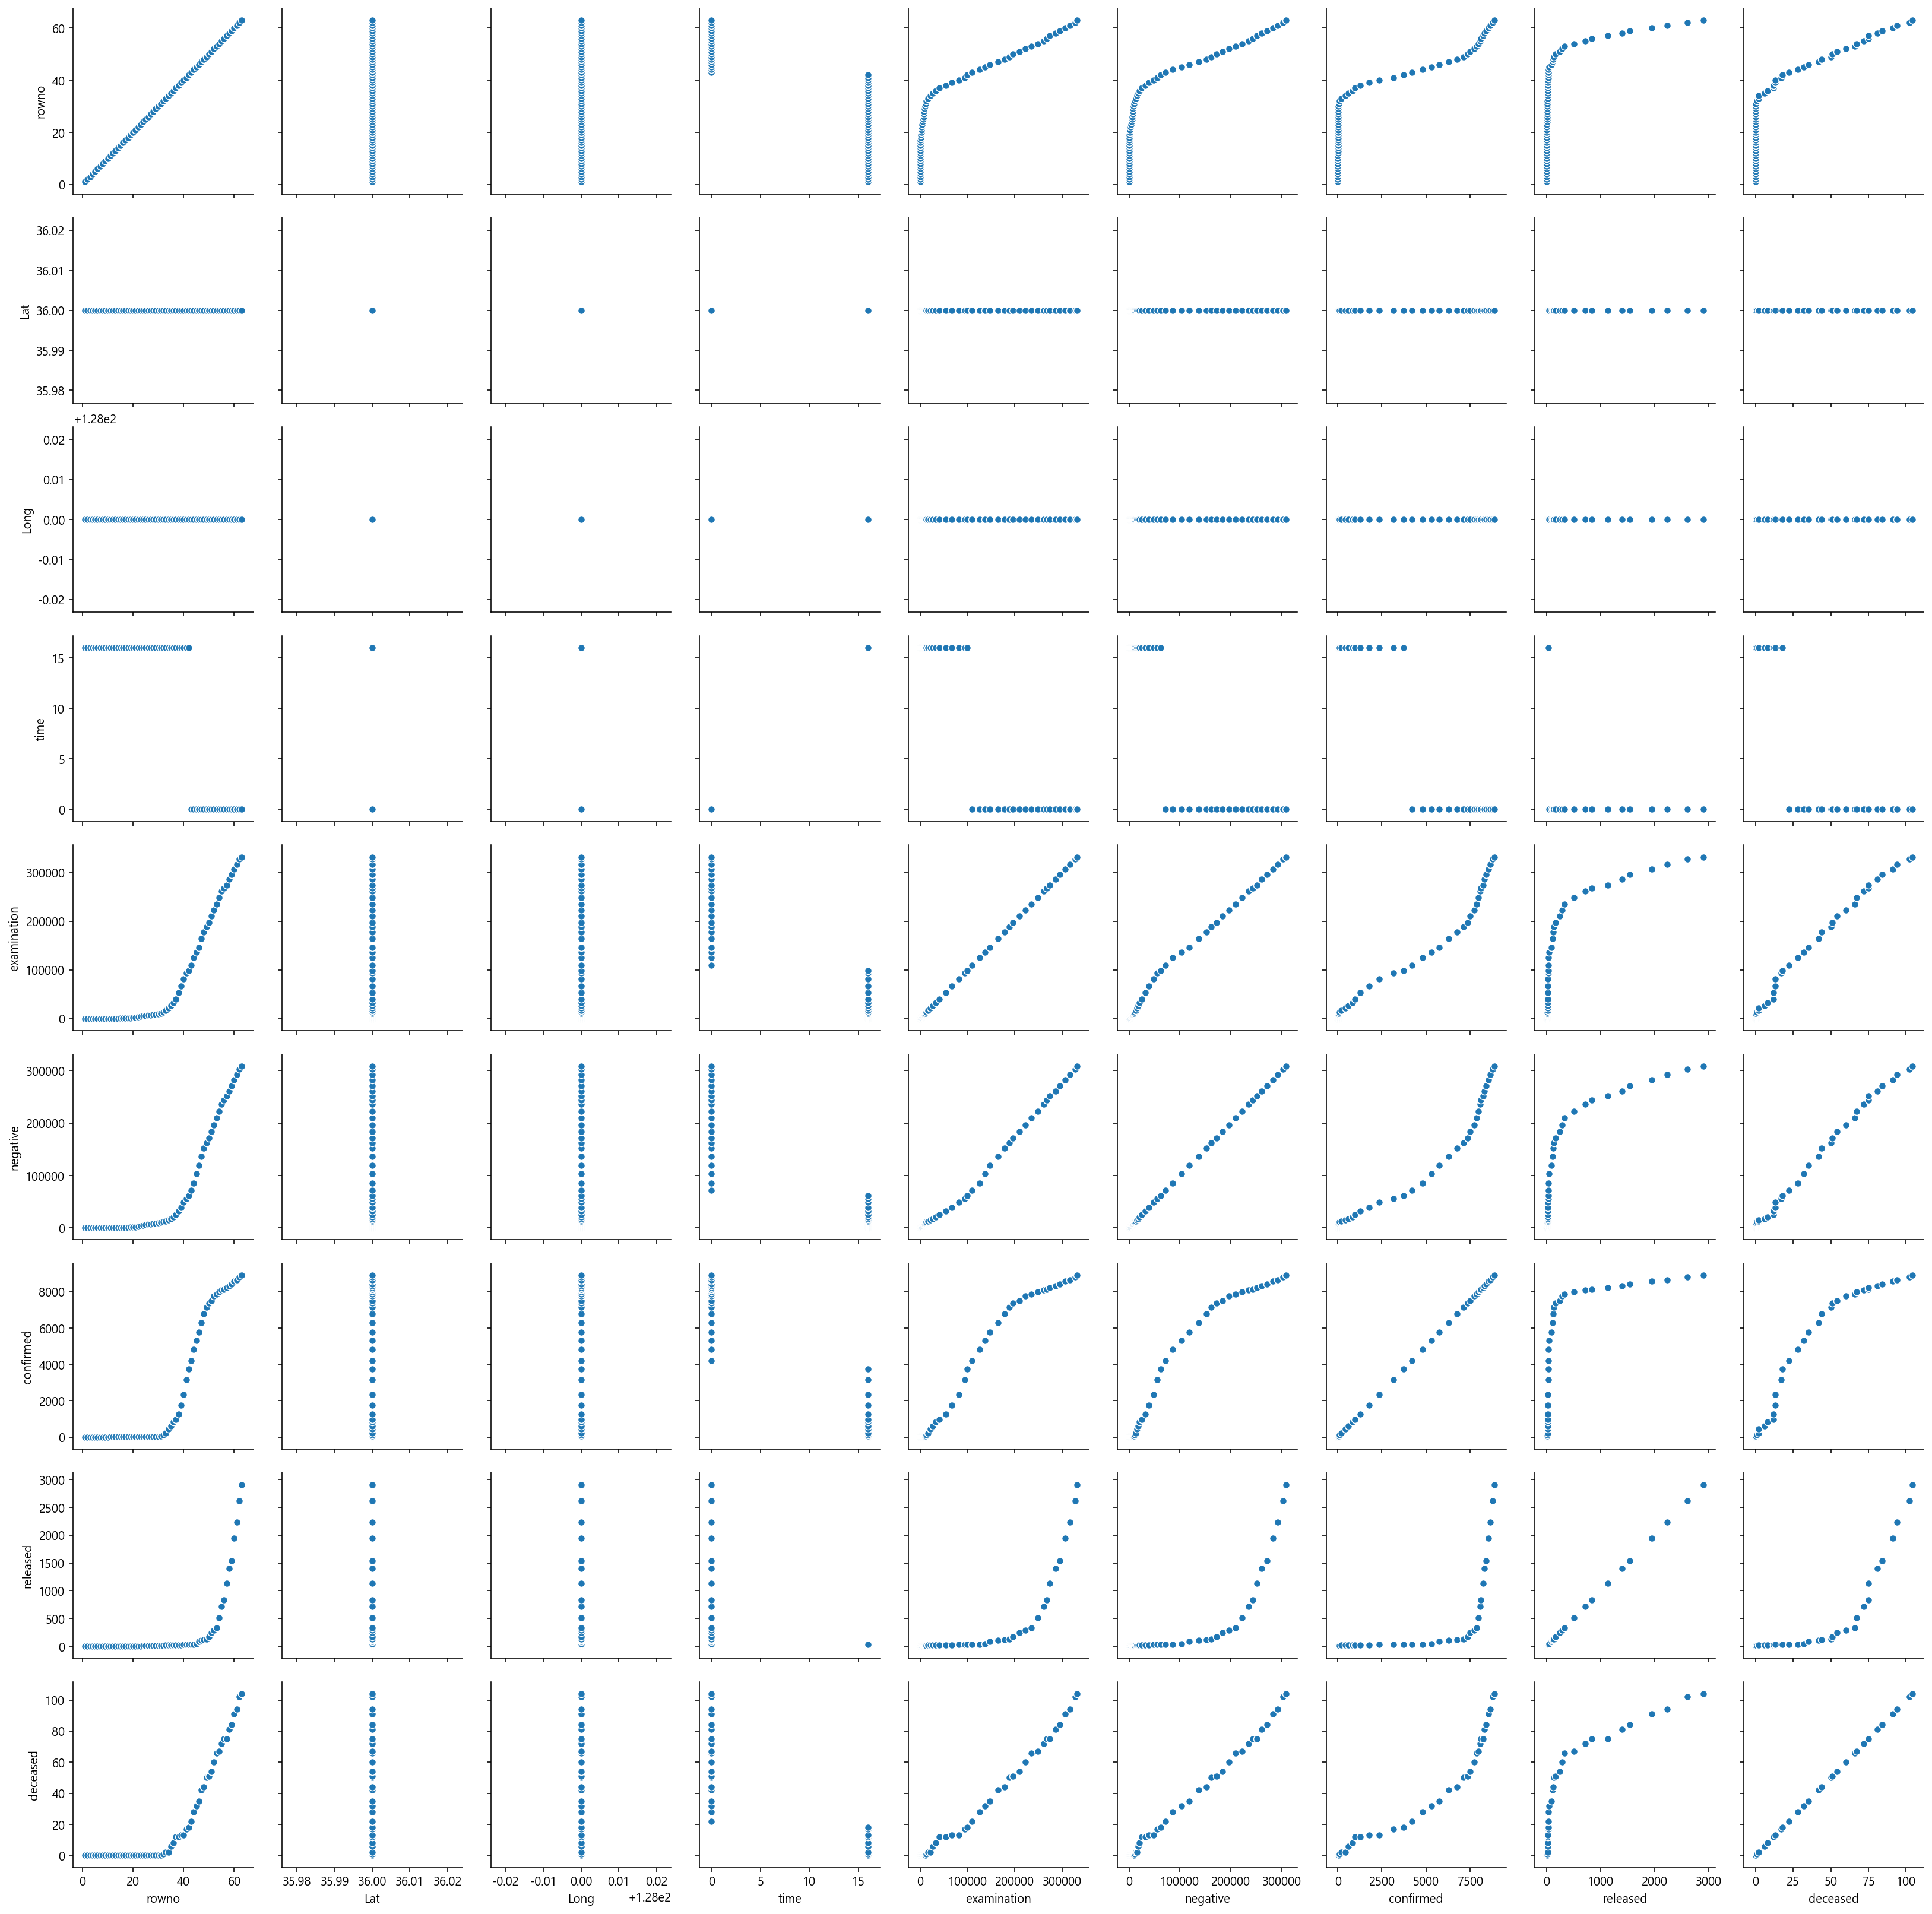

In [57]:
sns.pairplot(train_korea[["rowno", "Lat", "Long", "time", "examination", 'negative', 'confirmed', 'released', 'deceased']], diag_kind=None)

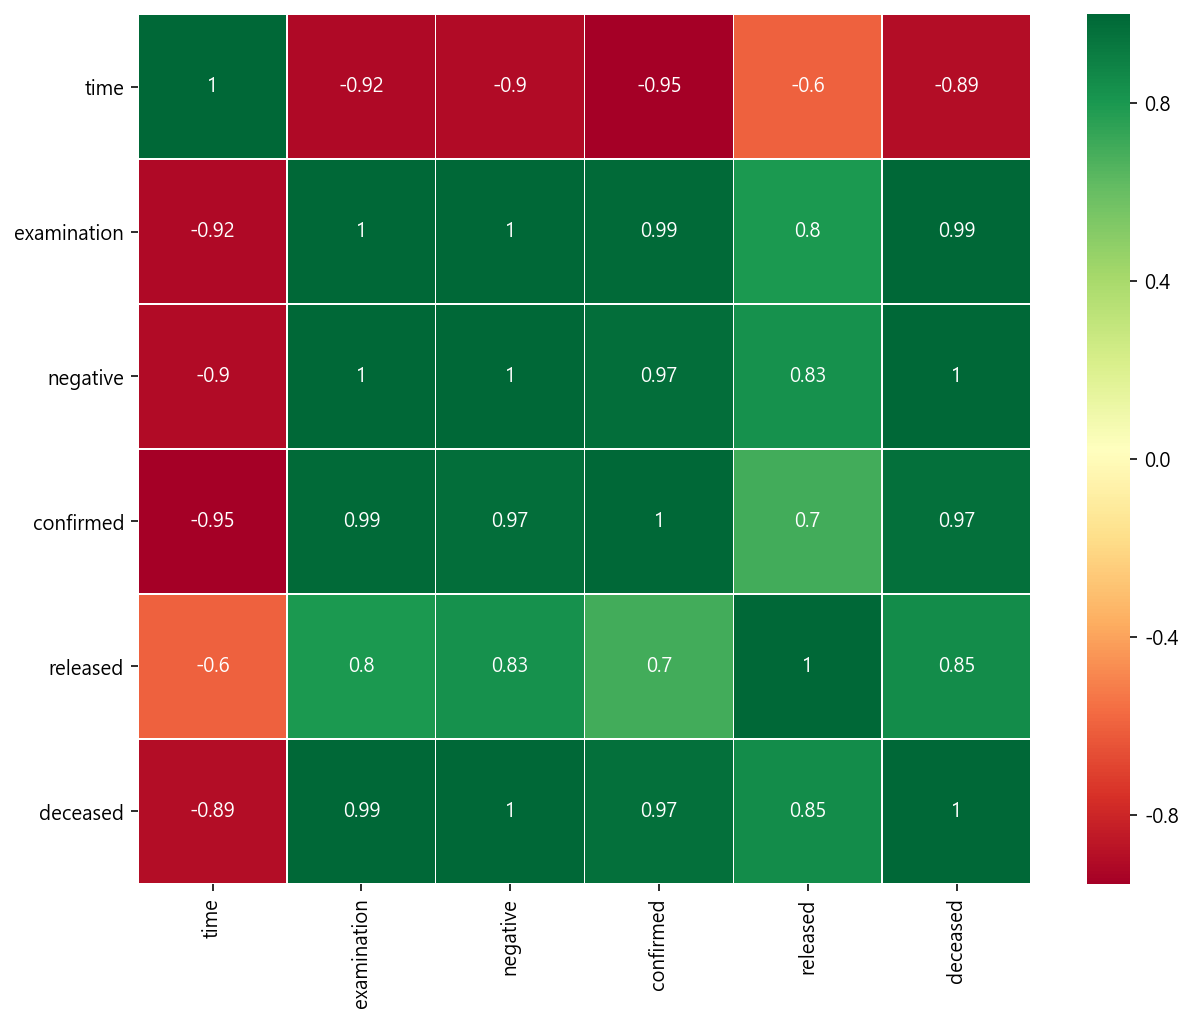

In [58]:
# data.corr() : correlation matrix of data
sns.heatmap(train_korea[["time","examination", 'negative', 'confirmed', 'released', 'deceased']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 위의 산점도를 확인한 결과 time은 제외해야함
- examination = negative + confirmed + (ongoing_test)이므로 negative도 제외하겠음
- fatalities는 deceased와 같은 의미이므로 fatalities를 없애겠음
- 다음과 같이 df라는 새로운 데이터프레임으로 재정의 하겠음

In [99]:
columns = [0,10,12,13,14,15]
df = train_korea.iloc[:,columns]
df

,rowno,examination,confirmed,released,deceased,firm_examination_rate
0,1,1.0,1.0,0.0,0.0,100.000000
1,2,1.0,1.0,0.0,0.0,100.000000
2,3,4.0,1.0,0.0,0.0,25.000000
3,4,22.0,1.0,0.0,0.0,4.545455
4,5,27.0,2.0,0.0,0.0,7.407407
...,...,...,...,...,...,...
58,59,295647.0,8413.0,1540.0,84.0,2.845623
59,60,307024.0,8565.0,1947.0,91.0,2.789684
60,61,316664.0,8652.0,2233.0,94.0,2.732234
61,62,327509.0,8799.0,2612.0,102.0,2.686644


In [100]:
df.describe()

,rowno,examination,confirmed,released,deceased,firm_examination_rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,86667.825397,2711.428571,282.031746,22.746032,6.204274
std,18.330303,111662.737369,3483.978175,653.609160,32.333927,17.418416
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.317233
25%,16.500000,660.500000,17.000000,0.500000,0.000000,2.072484
50%,32.000000,13202.000000,104.000000,16.000000,1.000000,2.879249
75%,47.500000,171464.500000,6525.500000,113.000000,43.000000,3.765620
max,63.000000,331780.000000,8897.000000,2909.000000,104.000000,100.000000


### Remove the Outlier
극단치 경계 : Q1 - (1.5 * IQR) **and**  Q3 + (1.5 * IQR)

In [101]:
data = df["firm_examination_rate"]

In [102]:
upper_quartile = np.percentile(df["firm_examination_rate"], 75)
lower_quartile = np.percentile(df["firm_examination_rate"], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data.loc[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data.loc[data>=lower_quartile-1.5*iqr].min()
print(upper_whisker, lower_whisker)

5.882352941176471 0.3172329103561195


[array([2.0724836 , 0.31723291]), array([3.76561977, 5.88235294])]

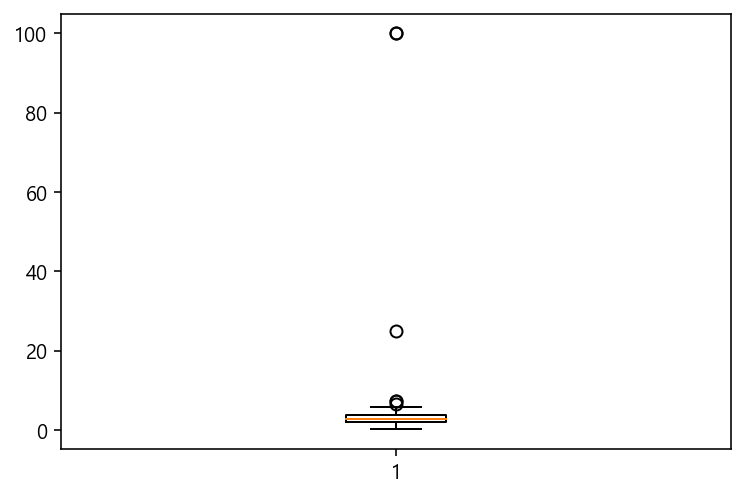

In [103]:
# 위에서 하던거랑 똑같음
B = plt.boxplot(df["firm_examination_rate"])
[item.get_ydata() for item in B['whiskers']]

In [104]:
df = df.loc[(df["firm_examination_rate"]>=lower_whisker) & (df["firm_examination_rate"]<=upper_whisker)]
df

,rowno,examination,confirmed,released,deceased,firm_examination_rate
3,4,22.0,1.0,0.0,0.0,4.545455
6,7,51.0,3.0,0.0,0.0,5.882353
8,9,116.0,4.0,0.0,0.0,3.448276
9,10,187.0,4.0,0.0,0.0,2.139037
10,11,246.0,6.0,0.0,0.0,2.439024
11,12,312.0,11.0,0.0,0.0,3.525641
12,13,371.0,12.0,0.0,0.0,3.234501
13,14,429.0,15.0,0.0,0.0,3.496503
14,15,490.0,15.0,0.0,0.0,3.061224
15,16,607.0,16.0,0.0,0.0,2.635914


다음 셀에 나올 api패키지는 https://kiyoja07.blogspot.com/2019/03/python-linear-regression.html 에서 참고하였음

In [105]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("firm_examination_rate ~ rowno+examination+confirmed+released+deceased", df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     firm_examination_rate   R-squared:                       0.587
Model:                               OLS   Adj. R-squared:                  0.546
Method:                    Least Squares   F-statistic:                     14.47
Date:                   Tue, 24 Mar 2020   Prob (F-statistic):           8.07e-09
Time:                           18:23:40   Log-Likelihood:                -69.321
No. Observations:                     57   AIC:                             150.6
Df Residuals:                         51   BIC:                             162.9
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.1796      0.438      9.536      0.000       3.300       5.060
rowno          -0.1081      0.022     -4.966      0.000      -0.152      -0.064
examination  2.872e-05   2.53e-05      1.134      0.262   -2.21e-05    7.96e-05
confirmed       0.0009      0.000      2.099      0.041    3.75e-05       0.002
released        0.0006      0.001      0.808      0.423      -0.001       0.002
deceased       -0.1348      0.062     -2.160      0.035      -0.260      -0.010
==============================================================================
Omnibus:                        3.959   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.107
Skew:                           0.552   Prob(JB):                        0.211
Kurtosis:                       3.301   Cond. No.                     5.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary
- p-value를 확인한 결과, 0.05보다 높은 **examiation, released**는 변수에서 제외한다.

In [106]:
# examiation, released 컬럼들은 변수에서 제외한다.
df = df.drop(columns=["examination", "released"])

reg = sm.OLS.from_formula("firm_examination_rate ~ rowno+confirmed+deceased", df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     firm_examination_rate   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.543
Method:                    Least Squares   F-statistic:                     23.22
Date:                   Tue, 24 Mar 2020   Prob (F-statistic):           9.92e-10
Time:                           18:23:44   Log-Likelihood:                -70.576
No. Observations:                     57   AIC:                             149.2
Df Residuals:                         53   BIC:                             157.3
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9610      0.401      9.887      0.000       3.157       4.765
rowno         -0.0913      0.017     -5.463      0.000      -0.125      -0.058
confirmed      0.0009      0.000      6.766      0.000       0.001       0.001
deceased      -0.0426      0.013     -3.188      0.002      -0.069      -0.016
==============================================================================
Omnibus:                        2.148   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.806
Skew:                           0.435   Prob(JB):                        0.405
Kurtosis:                       2.943   Cond. No.                     1.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

위의 결과로, 다음의 식을 얻을 수 있다.

\begin{align}
\textrm{firm_examination_rate} = 3.9610 -0.0913 * \textrm{rowno} + 0.0009 * \textrm{confirmed} -0.0426 * \textrm{deceased}
\end{align}

추가적으로, confirmed과 rowno의 관계, deceased와 rowno의 관계를 알아보자

In [111]:
reg = sm.OLS.from_formula("confirmed ~ rowno", df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              confirmed   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     264.3
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           1.16e-22
Time:                        18:31:50   Log-Likelihood:                -496.13
No. Observations:                  57   AIC:                             996.3
Df Residuals:                      55   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3740.8517    458.735     -8.155      0.000   -4660.177   -2821.527
rowno        192.8868     11.865     16.257      0.000     169.109     216.665
==============================================================================
Omnibus:                        8.847   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                3.465
Skew:                          -0.299   Prob(JB):                        0.177
Kurtosis:                       1.950   Cond. No.                         90.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
reg = sm.OLS.from_formula("deceased ~ rowno", df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               deceased   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           6.03e-20
Time:                        18:32:27   Log-Likelihood:                -236.19
No. Observations:                  57   AIC:                             476.4
Df Residuals:                      55   BIC:                             480.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.0940      4.798     -7.523      0.000     -45.709     -26.479
rowno          1.7531      0.124     14.127      0.000       1.504       2.002
==============================================================================
Omnibus:                       11.531   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.561
Skew:                           0.234   Prob(JB):                        0.169
Kurtosis:                       1.868   Cond. No.                         90.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위의 두 결과를 통해서 다음 두 식을 유도할 수 있다.

\begin{align*}
\begin{aligned}
\textrm{confirmed} = -3740.8517 + 192.8868 * \textrm{rowno} \\
\textrm{deceased} = -36.0940 + 1.7531 * \textrm{rowno}
\end{aligned}
\end{align*}


이 두 식을 위의 firm_examination_rate식에 넣으면 

\begin{align}
\textrm{firm_examination_rate} = 2.13183787 + 0.01523212 * \textrm{rowno}
\end{align}

firm_examination_rate = 0이 되기 위해서 rowno는 2.13183787 / 0.01523212 = 139.95674075 이어야 한다.
따라서 2020-01-20으로부터 140일 이후인 2020.6.7에 종식될 예정이다.

In [114]:
columns = [0,12,14]
df = train_korea.iloc[:,columns]
df

,rowno,confirmed,deceased
0,1,1.0,0.0
1,2,1.0,0.0
2,3,1.0,0.0
3,4,1.0,0.0
4,5,2.0,0.0
...,...,...,...
58,59,8413.0,84.0
59,60,8565.0,91.0
60,61,8652.0,94.0
61,62,8799.0,102.0


In [ ]:
df["deceased_predict"] = 1.7531 ∗ df["rowno"] − 36.0940
df["confirmed_predict"] = 192.8868 ∗ df["rowno"] − 3740.8517
# def fun1(x):
#     return 1.7531∗x − 36.0940

# def fun2(x):
#     return 192.8868 ∗ x − 3740.8517

여기까지가 끝입니다
----

In [ ]:
from sklearn.model_selection import train_test_split

# StandardScaler()로 normaliz시킴!
df_normalized = StandardScaler().fit_transform(df)

# 변수 설정
x = df_normalized.drop(columns="firm_examination_rate")
y = df_normalized["firm_examination_rate"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

https://ssungkang.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-PCA-2-python-%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-PCA-%EC%8B%A4%EC%8A%B5
    
    
df = StandardScaler().fit_transform(df)

------

train.shape

loc_group = ["Province/State", "Country/Region"]


def preprocess(df):
    df["Date"] = df["Date"].astype("datetime64[ms]")
    for col in loc_group:
        df[col].fillna("none", inplace=True)
    return df

df = preprocess(df)
sub_df = preprocess(pd.read_csv("../input/covid19-global-forecasting-week-1/test.csv"))
df.head()